## Técnicas de Suavizado 

In [1]:
import pandas as pd
import numpy as np

In [2]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
airline.isna().sum()

Thousands of Passengers    0
dtype: int64

In [4]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


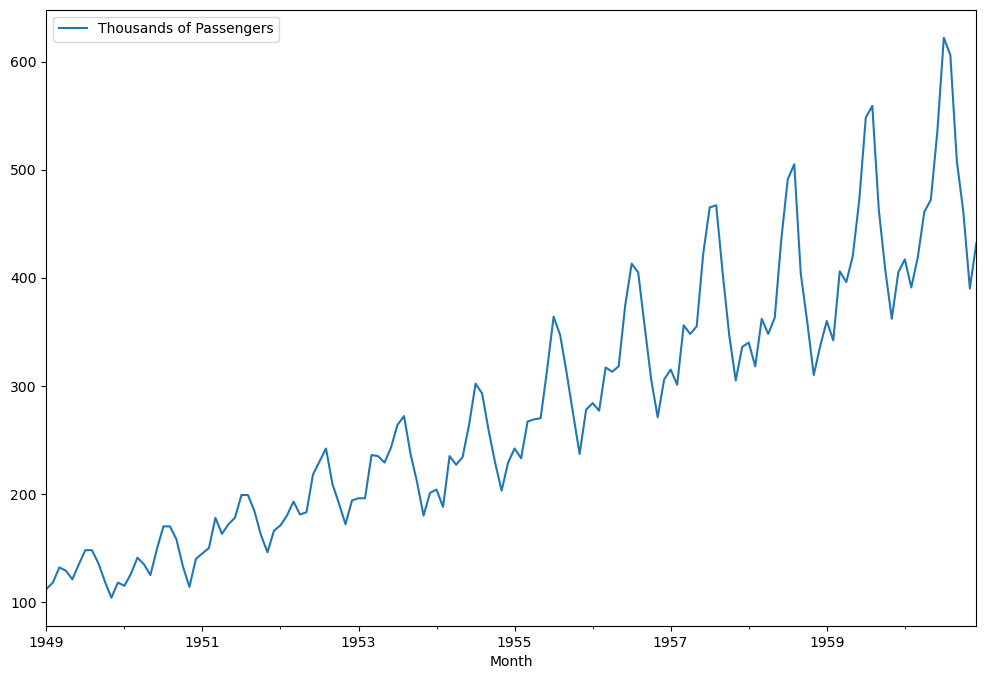

In [6]:
airline.plot(figsize=(12,8));

___
# SMA
## Simple Moving Average : Promedio móvil simple

$$ SMA=\frac{x_1+x_2+...+x_n}{n} $$

Donde $x_i$ son los valores de la variable, por tanto $SMA$ es un promedio aritmético de $n$ períodos atrás.

Los valores estimados se calculan a través de la fórmula.
El valor estimado es una media aritmética de $n$ periodos atrás. Lo importante es considerar que los primeros $n-1$ valores no van a poder calcularse.


In [7]:
airline['3-month-SMA'] = airline['Thousands of Passengers'].rolling(window=3).mean()
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()


# la funcion rolling permite seleccionar la ventana temporal (window)
# luego obtenemos la media - pueden hacerse otros 

In [8]:
airline.head(15)

# 5 y 11 valores faltantes respetivamente
# es una desventaja considerable de estos métodos

,Thousands of Passengers,3-month-SMA,6-month-SMA,12-month-SMA
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,120.666667,NaN,NaN
1949-04-01,129,126.333333,NaN,NaN
1949-05-01,121,127.333333,NaN,NaN
1949-06-01,135,128.333333,124.500000,NaN
1949-07-01,148,134.666667,130.500000,NaN
1949-08-01,148,143.666667,135.500000,NaN
1949-09-01,136,144.000000,136.166667,NaN


In [9]:
airline.tail(15)

,Thousands of Passengers,3-month-SMA,6-month-SMA,12-month-SMA
Month,,,,
1959-10-01,407,476.333333,478.166667,418.333333
1959-11-01,362,410.666667,468.500000,422.666667
1959-12-01,405,391.333333,457.333333,428.333333
1960-01-01,417,394.666667,435.500000,433.083333
1960-02-01,391,404.333333,407.500000,437.166667
1960-03-01,419,409.000000,400.166667,438.250000
1960-04-01,461,423.666667,409.166667,443.666667
1960-05-01,472,450.666667,427.500000,448.000000
1960-06-01,535,489.333333,449.166667,453.250000


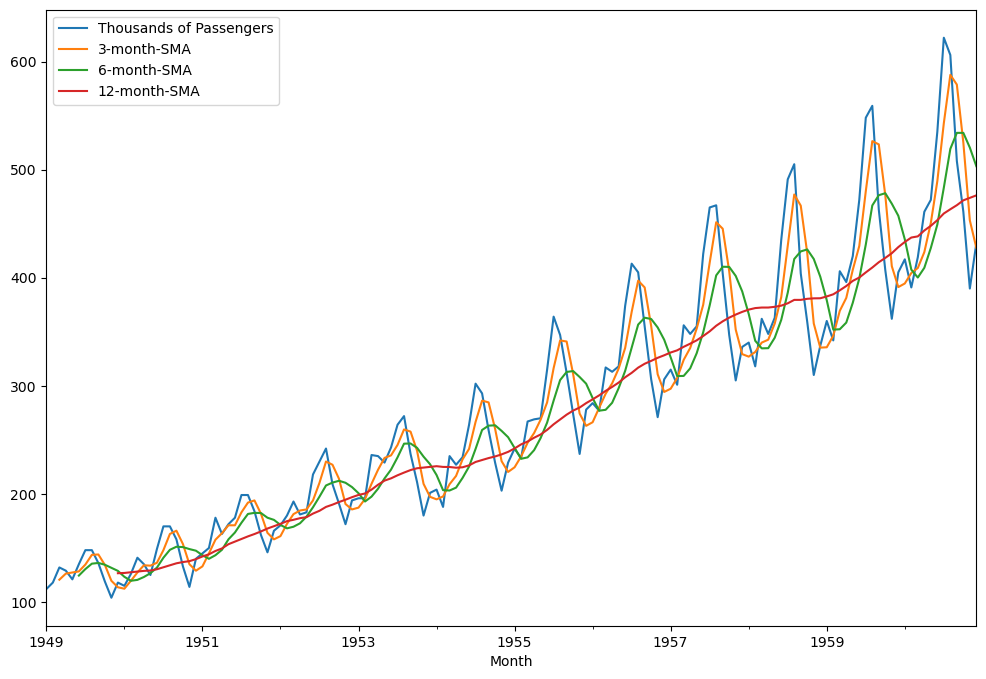

In [10]:
airline.plot(figsize=(12,8));

#la ventana da el mismo pero a todos los meses considerados de la ventana .. se ve en la formula de la media
# en la practica puede ser interesante indicar que los meses mas proximos al valor sean mas importantes que 
# los periodos mas antiguos

# esta es la idea del promedio movil ponderado .... se da pesos a las observaciones
# tambien elimina la falta de los primeros valores promediados

___
# EWMA
## Exponentially Weighted Moving Average: Promedio móvil ponderado exponencialmente



EWMA nos permitirá reducir el efecto de retraso de SMA y pondrá más peso en los valores que ocurrieron más recientemente. La cantidad de peso aplicada a los valores más recientes dependerá de los parámetros utilizados en EWMA, la fórmula con la que se calculan las estimaciones es:

$$y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$$

Donde $x_t$ son los valores de la variable, $w_i$ son los pesos (desde $i=0$ hasta $t$), y la $y_t$ es la estimación resultante.

La pregunta es ¿cómo se deben definir los pesos $w_i$?

Esto depende del argumento <tt>adjust</tt> dentro de la función <tt>.ewm()</tt>.

Cuando <tt>adjust=True</tt> (por defecto), los pesos se calculan con esta ecuación: $w_i = (1 - \alpha)^i$
Es un factor de decaimiento

Lo cual resulta en estas estimaciones: Los valores mas antiguos cada vez tienen menos peso para el período actual

$$y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1- \alpha)^2 + ...
+ (1 - \alpha)^t} $$

Se tiene que pasar el valor de alfa entre 0 y 1, cuanto mas cerca de 1 menos efecto tendra, cuando mas cerca de 0 mas anulara los picos. 

In [11]:
airline['EWMA-8'] = airline['Thousands of Passengers'].ewm(alpha=0.8,adjust=True).mean()
airline['EWMA-5'] = airline['Thousands of Passengers'].ewm(alpha=0.5,adjust=True).mean()
airline['EWMA-1'] = airline['Thousands of Passengers'].ewm(alpha=0.1,adjust=True).mean()

In [12]:
airline.head() # No se pierden elementos

,Thousands of Passengers,3-month-SMA,6-month-SMA,12-month-SMA,EWMA-8,EWMA-5,EWMA-1
Month,,,,,,,
1949-01-01,112,NaN,NaN,NaN,112.000000,112.000000,112.000000
1949-02-01,118,NaN,NaN,NaN,117.000000,116.000000,115.157895
1949-03-01,132,120.666667,NaN,NaN,129.096774,125.142857,121.372694
1949-04-01,129,126.333333,NaN,NaN,129.019231,127.200000,123.590579
1949-05-01,121,127.333333,NaN,NaN,122.601793,124.000000,122.957974


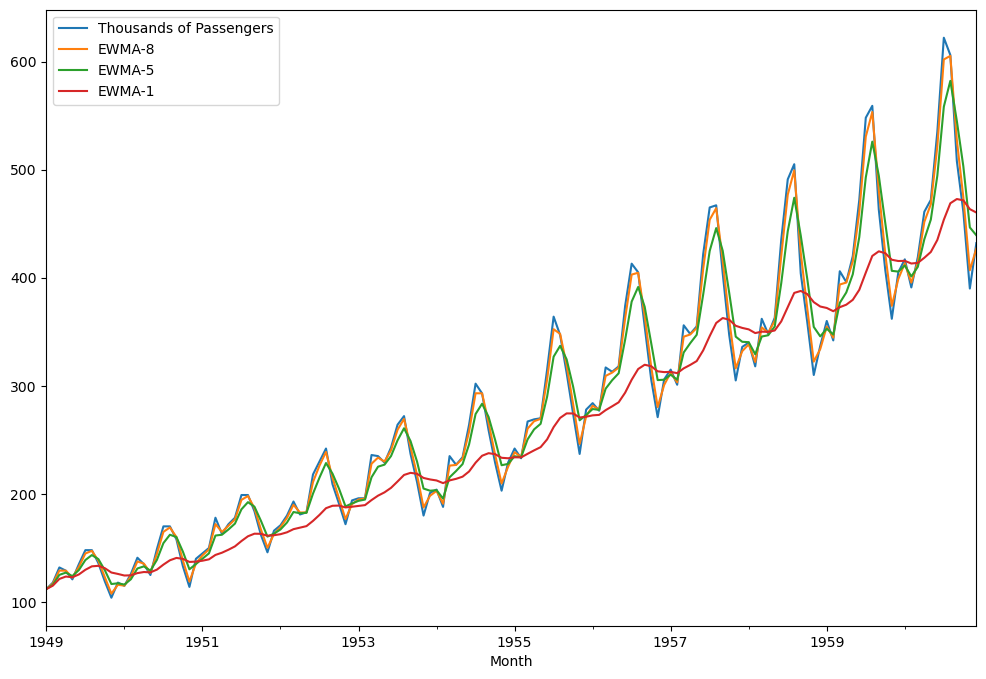

In [13]:
airline[['Thousands of Passengers','EWMA-8', 'EWMA-5','EWMA-1' ]].plot(figsize=(12,8));

Cuando <tt>adjust=False</tt> las estimaciones se calculan como:

$$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$$

Que es equivalente a usar estos pesos:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{si } i < t \\
    (1 - \alpha)^i        & \text{si } i = t.
\end{cases}\end{split}

El parámetro de suavizado $\alpha$ tiene que ser un valor $0<\alpha≤1$.
Es posible pasar directamente el valor del parámetro, pero una mejor práctica es pensar en él como una función de uno de estos tres posibles factores:
1. Span (duración)
2. Center of mass (centro de masa)
3. Half-life (vida media)

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{para una duracion (span)}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{para un centro de masa}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{para un parametro halflife}\ h > 0
 \end{cases}\end{split}

* <strong>Span</strong> corresponde a lo que comúnmente se llama un "promedio móvil de N-períodos", es la duración de la ventana temporal
* <strong>Center of mass</strong> tiene una interpretación más física y se puede pensar en términos de la duración: $c=(s−1)/2$
* <strong>Halflife</strong> es el período de tiempo para que el peso exponencial se reduzca a la mitad.
* <strong>Alpha</strong> es el parámetro de suavizado directamente.

Tenemos que pasar alguno de esos argumentos a la función. En nuestro ejemplo vamos a usar <tt>span=12</tt>.

In [14]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()
airline['EWMA6'] = airline['Thousands of Passengers'].ewm(span=6,adjust=False).mean()
airline['EWMA3'] = airline['Thousands of Passengers'].ewm(span=3,adjust=False).mean()

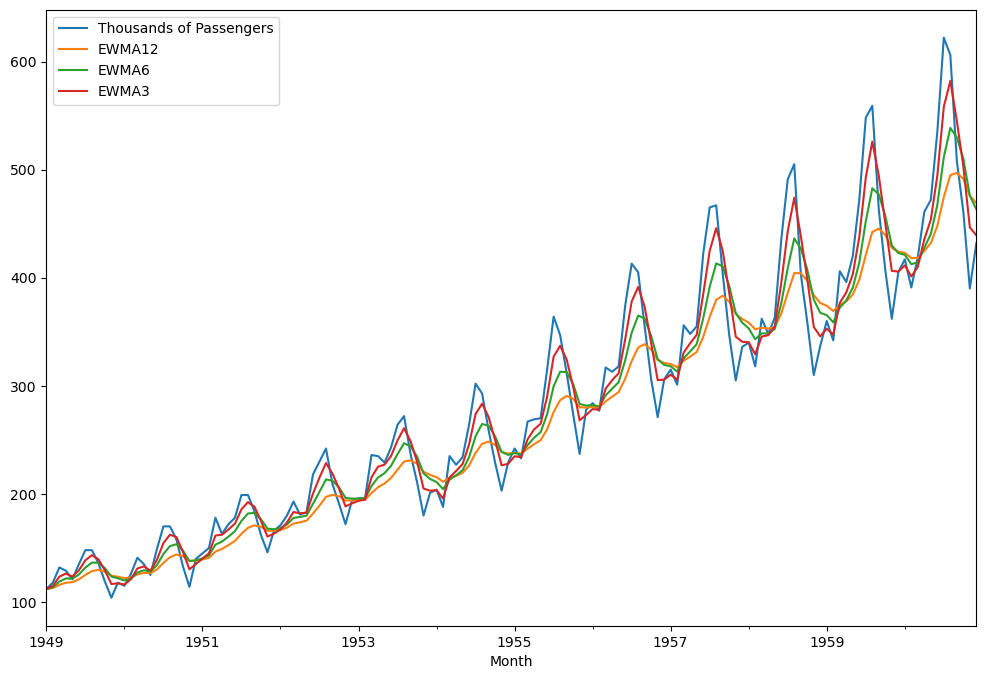

In [15]:
airline[['Thousands of Passengers','EWMA12', 'EWMA6','EWMA3' ]].plot(figsize=(12,8));

# damos el spam para generar alfa - adjast = false y asi se puede poner el span, y se aplica la media
# el comportamiento al principio es diferente del comportamiento al final
#primero es mas suavizado, y luego va teniendo una curva mas plana ... esto es porque los puntos mas cercanos tienen mas 
# importancia que los mas antiguos, por eso la curva crece hacia el final
# NO TIENE VALORES FALTANTES


## Comparación de SMA y EWMA

El EWMA recoge mucho mejor la información en el sentido de que elimina picos altos, y a la vez es mejor que el SMA, eso es porque los datos más recientes son mÁs relevantes que los datos antiguos, además no se pierden datos como en SMA.

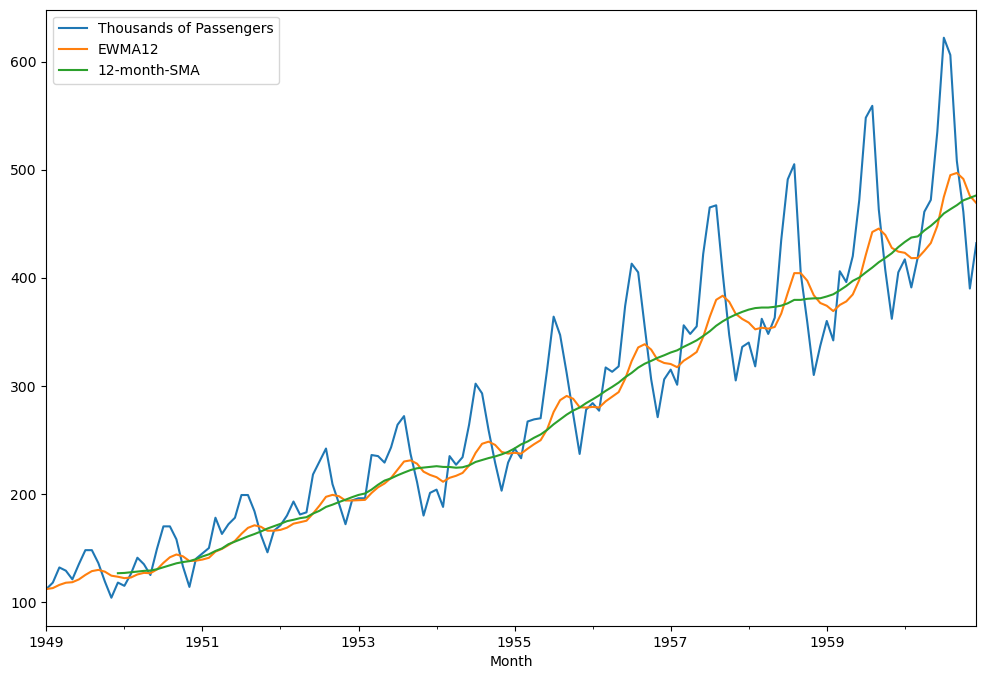

In [16]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8));